In [46]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model, svm
import statsmodels.api as sm
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [34]:
df = pd.read_csv("SDSS-DR14.csv")
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


## Data Description
- Position Data
    - objid: Object ID
    - ra: Right Ascension
    - dec: Declination

- Wavelength magnitude {u,g,r,i,z}
    - u: Ultraviolet
    - g: Green
    - r: Red
    - i: Infrared - 7600 Â
    - z: Infrared - 9100 Â

- Optical obs {redshift,plate,mjd,fiberid}
    - redshift: Wavelenght displacement
    - plate: SDSS plug plate used
    - mjd: Modified Julian Date
    - fiberid: Fiber number

Following data will not be used because they do not describe object characteristics

- objid
- ra
- dec
- run
- rerun
- camcol
- field
- specobjid
- plate
- mjd
- fiberid

In [35]:
#Drop unused columns
df.drop(columns = ['objid','ra','dec','run','rerun','camcol','field','specobjid','plate','mjd','fiberid'], inplace=True)

<Figure size 648x648 with 0 Axes>

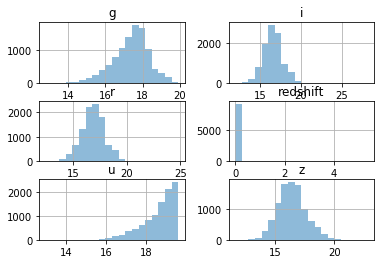

In [36]:
fig = plt.figure(figsize = (9,9))
ax = df.hist(bins = 20, alpha = 0.5)

In [37]:
Y = df['class']

In [47]:
X = df.drop(columns = ['class'])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state=25)

In [77]:
print('Total train samples by class \n', y_train.value_counts())
print('Ratios: \n', y_train.value_counts()/y_train.value_counts().min())

Total train samples by class 
 GALAXY    3545
STAR      2852
QSO        603
Name: class, dtype: int64
Ratios: 
 GALAXY    5.878939
STAR      4.729685
QSO       1.000000
Name: class, dtype: float64


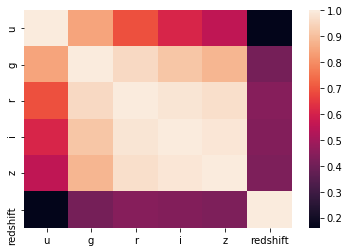

In [68]:
sb.heatmap(X_train.corr())

In [69]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

In [70]:
oversampled_train.groupby('class').count()

,u,g,r,i,z,redshift
class,,,,,,
GALAXY,3545,3545,3545,3545,3545,3545
QSO,3545,3545,3545,3545,3545,3545
STAR,2852,2852,2852,2852,2852,2852


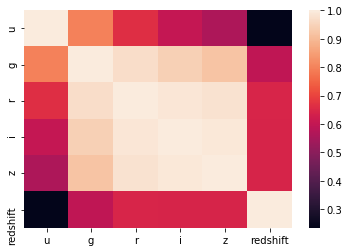

In [66]:
sb.heatmap(oversampled_trainX.corr())

# Logistic Regression

In [89]:

#Aprendizaje
LogReg = LogisticRegression(max_iter = 10000)
LogReg.fit(oversampled_trainX, oversampled_trainY)
#Predicciones
y_pred = LogReg.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10 µs


In [85]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1370,    8,   75],
       [   9,  238,    0],
       [  23,    5, 1272]])

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.94      0.96      1453
         QSO       0.95      0.96      0.96       247
        STAR       0.94      0.98      0.96      1300

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



# Decision tree

In [87]:
from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(oversampled_trainX,oversampled_trainY)

In [88]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1426   25    2]
 [  14  233    0]
 [   7    2 1291]]
              precision    recall  f1-score   support

      GALAXY       0.99      0.98      0.98      1453
         QSO       0.90      0.94      0.92       247
        STAR       1.00      0.99      1.00      1300

    accuracy                           0.98      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000

